# Exploratory Data Analysis (EDA) for Mental Health Dataset Splits

This notebook performs an in-depth exploratory data analysis (EDA) on the train, validation, and test splits of our mental health dataset. In this notebook we will do:

1. **Basic Dataset Overview**
   - Display dataset dimensions.
   - Show column names and data types.
   - Verify that there are no missing values in the `statement` and `status` columns.

2. **Label Distribution (Class Imbalance)**
   - Compute frequency and percentage of each label in the splits.
   - Plot bar charts to visualize the label distribution.
   - Confirm that stratification preserved label proportions across splits.

3. **Text Length Analysis**
   - Compute statistics (min, max, median, mean) for statement lengths (using token counts).
   - Plot histograms of the text lengths overall and by label.
   - Investigate if different labels tend to have longer or shorter statements.

4. **Basic Text Content Exploration**
   - Identify the most common words and bigrams per label.
   - Display a few random samples from each label to assess data quality.


In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import logging
from collections import Counter
from nltk.util import ngrams  # For generating n-grams 
import random
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Optional: Configure visualizations
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

# Configure logging (optional in a notebook, but useful for debugging)
logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Define file paths for the splits (adjust these if necessary)
train_file = r"C:\Users\User\Documents\Ai coursework\Group-1\train_data.csv"
val_file   = r"C:\Users\User\Documents\Ai coursework\Group-1\val_data.csv"
test_file  = r"C:\Users\User\Documents\Ai coursework\Group-1\test_data.csv"

# Load the datasets
try:
    train_df = pd.read_csv(train_file)
    val_df   = pd.read_csv(val_file)
    test_df  = pd.read_csv(test_file)
    
    logging.info(f"Train shape: {train_df.shape}")
    logging.info(f"Validation shape: {val_df.shape}")
    logging.info(f"Test shape: {test_df.shape}")
except Exception as e:
    logging.error(f"Error loading split files: {e}")
    raise

# Drop rows in the validation set where the 'statement' is missing
val_df = val_df.dropna(subset=["statement"])
logging.info(f"Validation set shape after dropping rows with missing 'statement': {val_df.shape}")



INFO: Train shape: (33331, 3)
INFO: Validation shape: (7143, 3)
INFO: Test shape: (7143, 3)
INFO: Validation set shape after dropping rows with missing 'statement': (7142, 3)


In [3]:
# Function to print basic overview for a DataFrame
def print_overview(df: pd.DataFrame, name: str):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("Columns and Data Types:")
    print(df.dtypes)
    print("\n")

# Overview for each split
print_overview(train_df, "Training Set")
print_overview(val_df, "Validation Set")
print_overview(test_df, "Test Set")


--- Training Set ---
Shape: (33331, 3)
Columns and Data Types:
Unnamed: 0     int64
statement     object
status        object
dtype: object


--- Validation Set ---
Shape: (7142, 3)
Columns and Data Types:
Unnamed: 0     int64
statement     object
status        object
dtype: object


--- Test Set ---
Shape: (7143, 3)
Columns and Data Types:
Unnamed: 0     int64
statement     object
status        object
dtype: object




In [4]:
# Check missing values in each dataset for 'statement' and 'status'
def missing_values(df: pd.DataFrame, name: str):
    missing = df[['statement', 'status']].isnull().sum()
    print(f"Missing values in {name}:")
    print(missing)
    print("\n")

missing_values(train_df, "Training Set")
missing_values(val_df, "Validation Set")
missing_values(test_df, "Test Set")


Missing values in Training Set:
statement    0
status       0
dtype: int64


Missing values in Validation Set:
statement    0
status       0
dtype: int64


Missing values in Test Set:
statement    0
status       0
dtype: int64




## Label Distribution (Class Imbalance)

In this section we will analyze the distribution of the mental health status labels in each split:
- Compute frequency counts and percentages.
- Plot bar charts to visualize the distribution.
- Verify that stratification has maintained similar proportions across the splits.


In [5]:
# Function to print label frequency and percentage
def label_distribution(df: pd.DataFrame, name: str):
    print(f"--- {name} ---")
    counts = df["status"].value_counts()
    percentages = df["status"].value_counts(normalize=True) * 100
    dist_df = pd.DataFrame({"Count": counts, "Percentage": percentages.round(2)})
    print(dist_df)
    print("\n")

label_distribution(train_df, "Training Set")
label_distribution(val_df, "Validation Set")
label_distribution(test_df, "Test Set")


--- Training Set ---
            Count  Percentage
status                       
Normal      11198       33.60
Depression  10559       31.68
Suicidal     7447       22.34
Anxiety      2525        7.58
Stress       1602        4.81


--- Validation Set ---
            Count  Percentage
status                       
Normal       2400       33.60
Depression   2263       31.69
Suicidal     1595       22.33
Anxiety       541        7.57
Stress        343        4.80


--- Test Set ---
            Count  Percentage
status                       
Normal       2399       33.59
Depression   2263       31.68
Suicidal     1596       22.34
Anxiety       542        7.59
Stress        343        4.80




C:\Users\User\AppData\Local\Temp\ipykernel_20732\909513741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="status", data=df, order=df["status"].value_counts().index, palette="viridis")


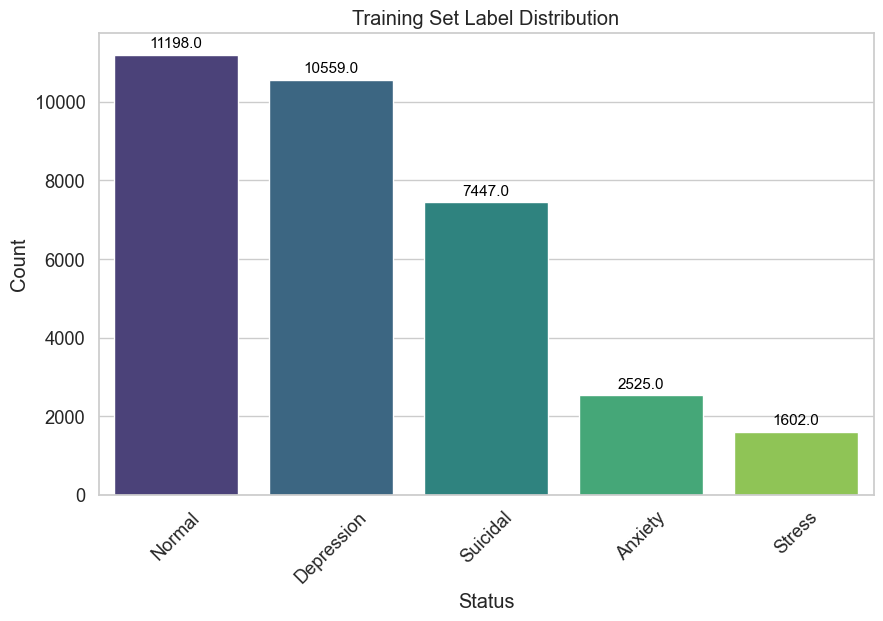

C:\Users\User\AppData\Local\Temp\ipykernel_20732\909513741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="status", data=df, order=df["status"].value_counts().index, palette="viridis")


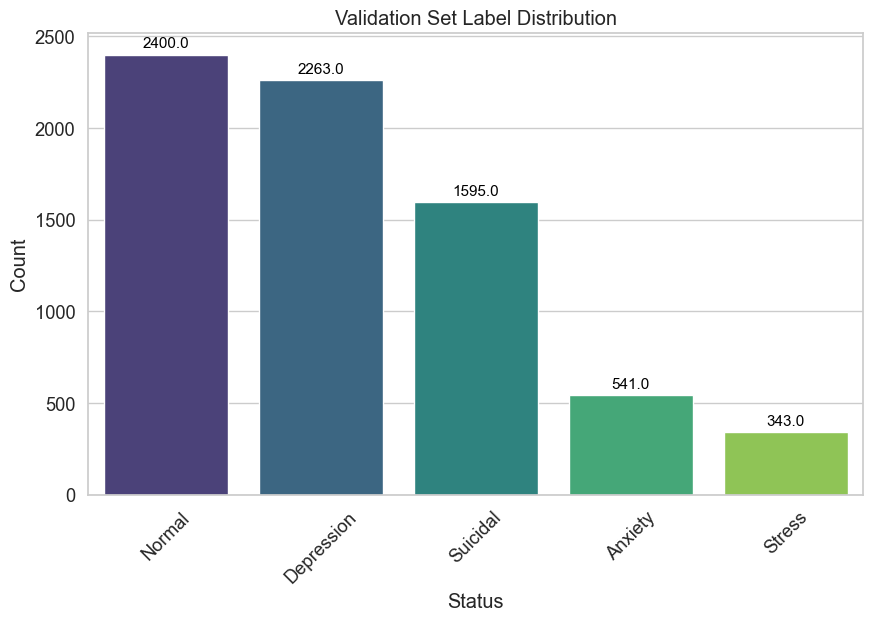

C:\Users\User\AppData\Local\Temp\ipykernel_20732\909513741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="status", data=df, order=df["status"].value_counts().index, palette="viridis")


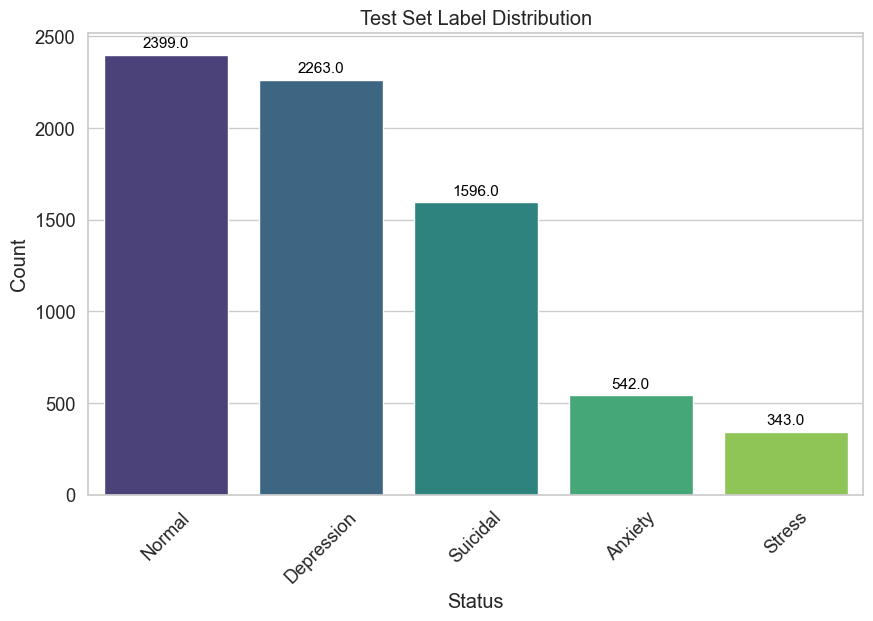

In [6]:
# Function to plot label distribution as a bar chart
def plot_label_distribution(df: pd.DataFrame, title: str):
    plt.figure()
    ax = sns.countplot(x="status", data=df, order=df["status"].value_counts().index, palette="viridis")
    plt.title(title)
    plt.xlabel("Status")
    plt.ylabel("Count")
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.xticks(rotation=45)
    plt.show()

plot_label_distribution(train_df, "Training Set Label Distribution")
plot_label_distribution(val_df, "Validation Set Label Distribution")
plot_label_distribution(test_df, "Test Set Label Distribution")


## Text Length Analysis

Here we will:
- Compute the length (in tokens) of each statement.
- Generate summary statistics (min, max, median, mean).
- Plot histograms to inspect the distribution of statement lengths.
- Examine average text lengths per label.


In [7]:
# Create a function to compute token count robustly
def compute_text_length(text) -> int:

    # If the text is null, return 0 tokens
    if pd.isnull(text):
        return 0
    # Convert the input to string in case it's not already
    text = str(text)
    return len(text.split())

# Apply the function to each dataset
for df, name in zip([train_df, val_df, test_df], ["Training", "Validation", "Test"]):
    df["text_length"] = df["statement"].apply(compute_text_length)
    print(f"--- {name} Set Text Length Statistics ---")
    print(df["text_length"].describe())
    print("\n")


--- Training Set Text Length Statistics ---
count    33331.000000
mean       107.867511
std        159.407506
min          1.000000
25%         14.000000
50%         56.000000
75%        140.000000
max       6300.000000
Name: text_length, dtype: float64


--- Validation Set Text Length Statistics ---
count    7142.000000
mean      107.759311
std       156.137112
min         1.000000
25%        14.000000
50%        57.000000
75%       138.000000
max      2412.000000
Name: text_length, dtype: float64


--- Test Set Text Length Statistics ---
count    7143.00000
mean      108.48901
std       169.32565
min         1.00000
25%        14.00000
50%        55.00000
75%       136.00000
max      5248.00000
Name: text_length, dtype: float64




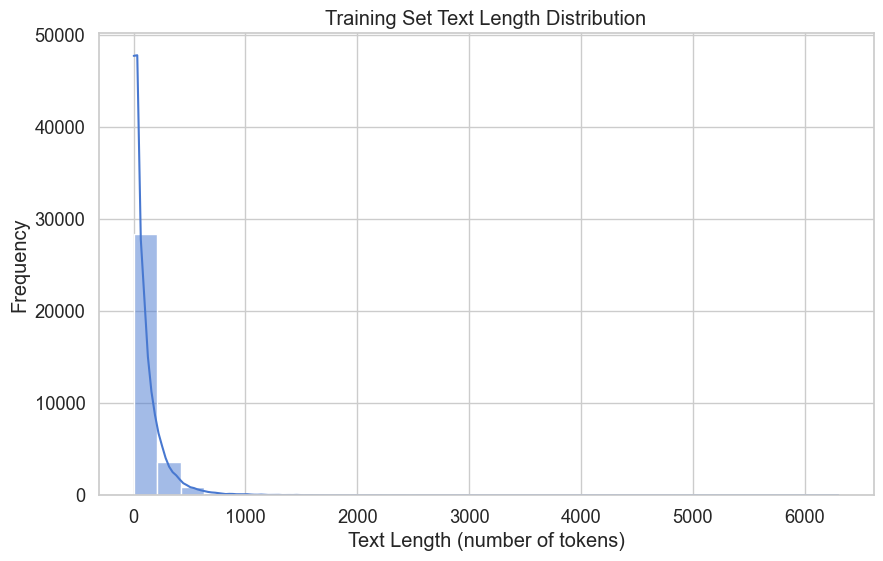

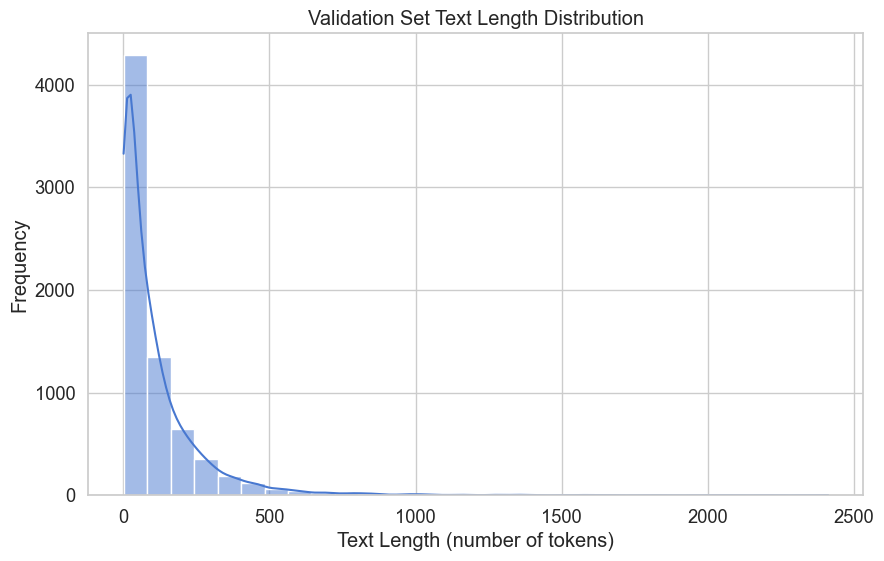

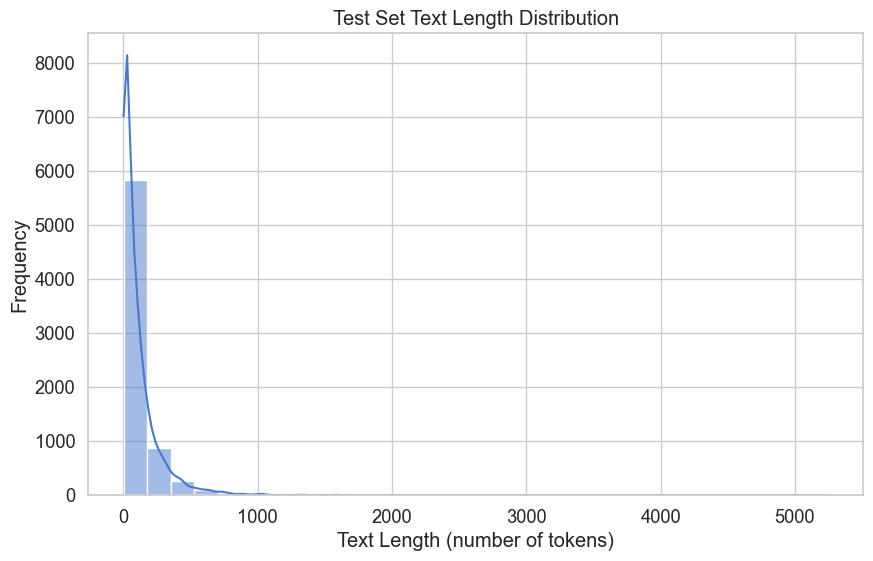

In [8]:
# Plot overall histogram of text lengths for each split
def plot_text_length_histogram(df: pd.DataFrame, title: str):
    plt.figure()
    sns.histplot(df["text_length"], bins=30, kde=True)
    plt.title(title)
    plt.xlabel("Text Length (number of tokens)")
    plt.ylabel("Frequency")
    plt.show()

plot_text_length_histogram(train_df, "Training Set Text Length Distribution")
plot_text_length_histogram(val_df, "Validation Set Text Length Distribution")
plot_text_length_histogram(test_df, "Test Set Text Length Distribution")


Training Set shape after ensuring 'text_length': (33331, 4)
Validation Set shape after ensuring 'text_length': (7142, 4)
Test Set shape after ensuring 'text_length': (7143, 4)
Average Text Length by Label (Training Set):
       status  average_text_length
0     Anxiety           143.375842
1  Depression           167.930486
2      Normal            17.387659
3      Stress           111.863296
4    Suicidal           145.859809




C:\Users\User\AppData\Local\Temp\ipykernel_20732\1454270947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="status", y="average_text_length", data=avg_length_by_label, palette="coolwarm")


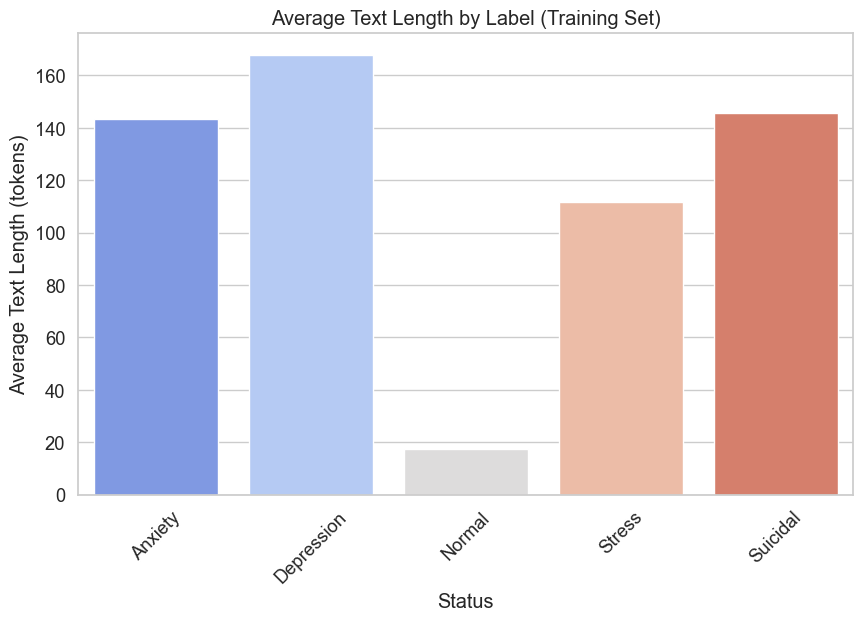

Average Text Length by Label (Validation Set):
       status  average_text_length
0     Anxiety           148.401109
1  Depression           168.016792
2      Normal            17.918750
3      Stress           110.947522
4    Suicidal           142.978056




C:\Users\User\AppData\Local\Temp\ipykernel_20732\1454270947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="status", y="average_text_length", data=avg_length_by_label, palette="coolwarm")


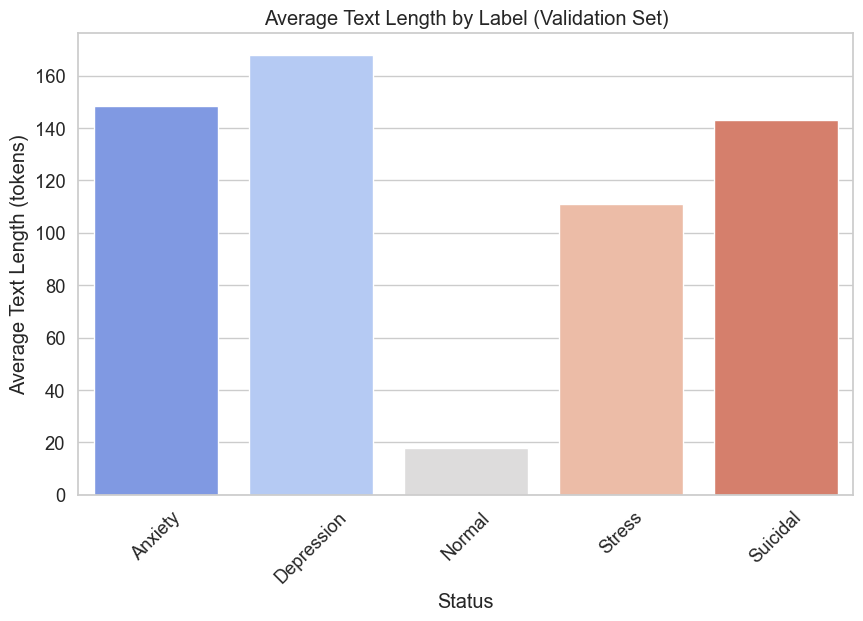

Average Text Length by Label (Test Set):
       status  average_text_length
0     Anxiety           134.948339
1  Depression           168.642510
2      Normal            16.616924
3      Stress           108.058309
4    Suicidal           152.399123




C:\Users\User\AppData\Local\Temp\ipykernel_20732\1454270947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="status", y="average_text_length", data=avg_length_by_label, palette="coolwarm")


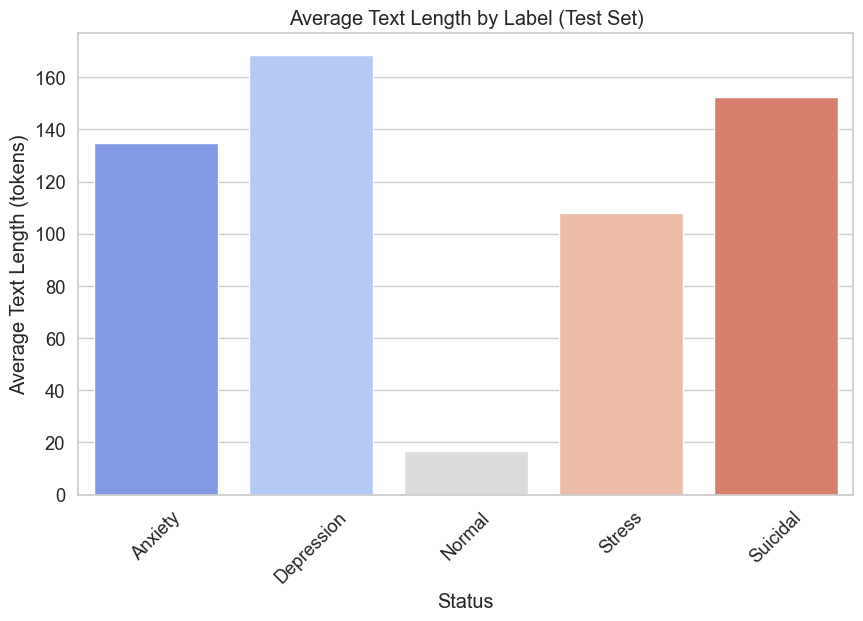

In [9]:
# Ensure each dataset has a 'text_length' column computed from the 'statement' column.
def compute_text_length(text):
    """Compute the number of tokens in the given text."""
    if pd.isnull(text):
        return 0
    return len(str(text).split())

# Create a dictionary for the datasets
datasets = {
    "Training Set": train_df,
    "Validation Set": val_df,
    "Test Set": test_df
}

# For each dataset, check if 'text_length' exists; if not, compute it.
for name, df in datasets.items():
    if "text_length" not in df.columns:
        df["text_length"] = df["statement"].apply(compute_text_length)
    print(f"{name} shape after ensuring 'text_length': {df.shape}")

# Now compute and plot average text length by label for each dataset
for name, df in datasets.items():
    # Group by 'status' and compute average text length
    avg_length_by_label = df.groupby("status")["text_length"].mean().reset_index()
    avg_length_by_label.columns = ["status", "average_text_length"]
    
    print(f"Average Text Length by Label ({name}):")
    print(avg_length_by_label)
    print("\n")
    
    # Plot the average text length as a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x="status", y="average_text_length", data=avg_length_by_label, palette="coolwarm")
    plt.title(f"Average Text Length by Label ({name})")
    plt.xlabel("Status")
    plt.ylabel("Average Text Length (tokens)")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_20732\3881510283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status", y="text_length", data=train_df, palette="Set2")


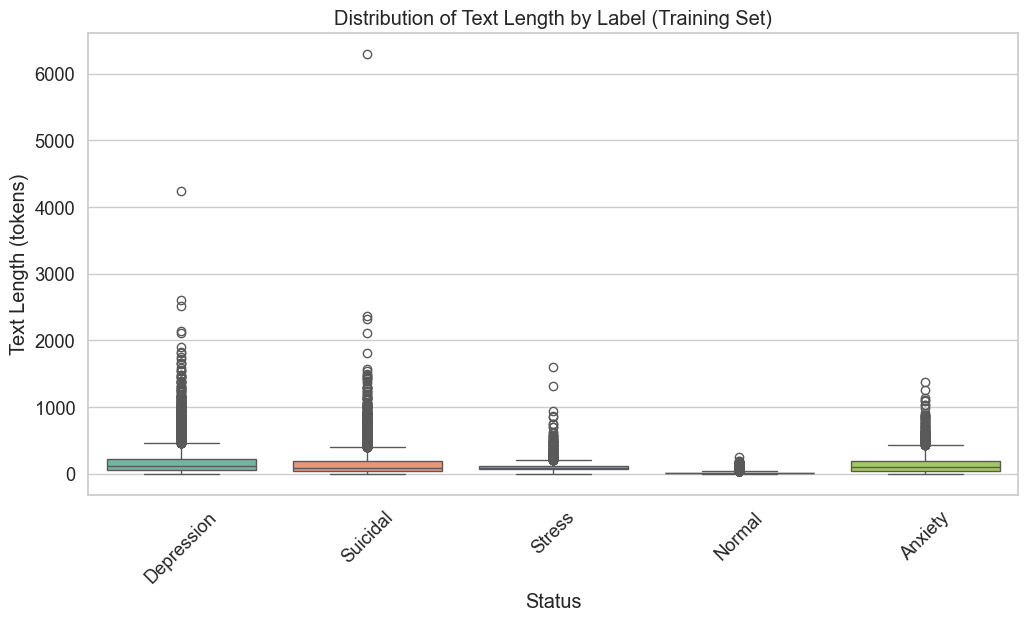

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="status", y="text_length", data=train_df, palette="Set2")
plt.title("Distribution of Text Length by Label (Training Set)")
plt.xlabel("Status")
plt.ylabel("Text Length (tokens)")
plt.xticks(rotation=45)
plt.show()

## Basic Text Content Exploration

In this section we explore the actual textual content by:
- Extracting the most common words and bigrams per label.
- Displaying a few random samples from each label to inspect data quality.


In [11]:
# Create a custom stopword set: combine NLTK English stopwords with additional low-value tokens
custom_stopwords = set([
    "like", "know", "get", "want", "really", "just", "even", "im", "dont",
    "i", "am", "feel", "oh", "uh", "um", "would", "could", "think", "go", "year", "old", "school", "now", "day", "time", "first", "right", "now", "i'm", "i've", "one", "im", "ive", "going", "also", "something", "wan"
])
all_stopwords = set(stopwords.words("english")).union(custom_stopwords)

# Function to get most common words for a given subset of data, excluding all stopwords
def get_common_words(text_series, top_n=10):
    words = " ".join(text_series).split()
    filtered_words = [word for word in words if word.lower() not in all_stopwords]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

# Function to get most common bigrams for a given subset of data, excluding any bigrams that contain stopwords.
def get_common_bigrams(text_series, top_n=10):
    words = " ".join(text_series).split()
    bigram_list = list(ngrams(words, 2))
    # Keep only bigrams where both words are not in the stopword set
    filtered_bigrams = [bg for bg in bigram_list if (bg[0].lower() not in all_stopwords and bg[1].lower() not in all_stopwords)]
    bigram_counts = Counter(filtered_bigrams)
    return bigram_counts.most_common(top_n)

# Example usage (iterate over labels):
labels = train_df["status"].unique()
for label in labels:
    subset = train_df[train_df["status"] == label]["statement"]
    common_words = get_common_words(subset)
    common_bigrams = get_common_bigrams(subset)

    print(f"Label: {label}")
    print("Top 10 common words (excluding stopwords):")
    for word, count in common_words:
        print(f"  {word}: {count}")
    print("\nTop 10 common bigrams (excluding stopwords):")
    for bigram, count in common_bigrams:
        print(f"  {' '.join(bigram)}: {count}")
    print("\n" + "-"*50 + "\n")

Label: Depression
Top 10 common words (excluding stopwords):
  life: 5786
  people: 4824
  cannot: 4765
  never: 3698
  depression: 3481
  much: 3166
  make: 2902
  help: 2761
  me.: 2684
  always: 2680

Top 10 common bigrams (excluding stopwords):
  mental health: 513
  anyone else: 347
  every single: 228
  pretty much: 208
  best friend: 201
  panic attack: 201
  take care: 191
  ever since: 176
  years ago: 174
  2 years: 159

--------------------------------------------------

Label: Suicidal
Top 10 common words (excluding stopwords):
  cannot: 5748
  life: 3724
  people: 2943
  never: 2527
  take: 2481
  anymore.: 2435
  me.: 2433
  fucking: 2092
  much: 2054
  it.: 1863

Top 10 common bigrams (excluding stopwords):
  cannot take: 1469
  kill myself.: 258
  mental health: 247
  suicidal thoughts: 226
  un perdedorsoy: 199
  perdedorsoy un: 199
  every single: 173
  cannot stop: 133
  wallsi'm living: 128
  kill myself,: 125

--------------------------------------------------

Lab

In [12]:
def get_top_tfidf_words(text_series, top_n=10):
    """
    Compute the TF–IDF scores for the given text series and return the top_n words by
    highest average TF–IDF score, excluding our stopwords.
    """
    # Convert our set of stopwords to a list, which is accepted by TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words=list(all_stopwords))
    tfidf_matrix = vectorizer.fit_transform(text_series)
    # Compute mean TF–IDF scores for each term across documents
    mean_tfidf = tfidf_matrix.mean(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    term_tfidf = list(zip(terms, mean_tfidf))
    # Sort by descending TF–IDF score
    term_tfidf_sorted = sorted(term_tfidf, key=lambda x: x[1], reverse=True)
    return term_tfidf_sorted[:top_n]

# Display top TF–IDF words for each label in the training set
labels = train_df["status"].unique()
for label in labels:
    subset = train_df[train_df["status"] == label]["statement"]
    top_tfidf = get_top_tfidf_words(subset, top_n=10)
    print(f"Label: {label}")
    print("Top 10 words by average TF–IDF (excluding stopwords):")
    for word, score in top_tfidf:
        print(f"  {word}: {score:.4f}")
    print("\n" + "-"*50 + "\n")


Label: Depression
Top 10 words by average TF–IDF (excluding stopwords):
  life: 0.0315
  depression: 0.0262
  cannot: 0.0248
  people: 0.0243
  help: 0.0188
  much: 0.0175
  never: 0.0175
  anymore: 0.0172
  anything: 0.0169
  feeling: 0.0166

--------------------------------------------------

Label: Suicidal
Top 10 words by average TF–IDF (excluding stopwords):
  life: 0.0341
  cannot: 0.0323
  die: 0.0241
  people: 0.0234
  anymore: 0.0219
  fucking: 0.0212
  kill: 0.0205
  help: 0.0194
  much: 0.0190
  hate: 0.0185

--------------------------------------------------

Label: Stress
Top 10 words by average TF–IDF (excluding stopwords):
  stress: 0.0299
  work: 0.0190
  anxiety: 0.0180
  help: 0.0180
  life: 0.0157
  things: 0.0149
  job: 0.0147
  back: 0.0142
  much: 0.0141
  people: 0.0138

--------------------------------------------------

Label: Normal
Top 10 words by average TF–IDF (excluding stopwords):
  good: 0.0098
  work: 0.0085
  today: 0.0078
  people: 0.0075
  still: 0.0

In [13]:
# Function to display random samples from each label
def display_random_samples(df: pd.DataFrame, label: str, sample_size: int = 3):
    print(f"--- Random Samples for Label: {label} ---")
    subset = df[df["status"] == label]
    if subset.empty:
        print("No samples available.\n")
        return
    samples = subset.sample(min(sample_size, len(subset)), random_state=42)["statement"].tolist()
    for i, sample in enumerate(samples, 1):
        print(f"Sample {i}: {sample}\n")

for label in sorted(train_df["status"].unique()):
    display_random_samples(train_df, label)


--- Random Samples for Label: Anxiety ---
Sample 1: good foods to ease back into eating after a few days of diarrhoea and some vomiting. i havent eaten in over two days after having bad diarrhoea and some vomiting, everything i eat comes back out. i was wondering what good foods are to reconstruct good, healthy eating habits.

Sample 2: i dont know how to live with this it's funny. all of my anxiety centers around my health and possible death and the constant, aching want, to just live. but because i am do anxious all the time, i'm not living. not really. it's been a bad few weeks. i move from the bed to the couch, doing nothing but laying down. i feel hopeless and scared and so sure something is wrong with me that i'm making myself sick. i am so petrified of being sick and dying that its robbing me of my life. i'm so scared of not being there for my kids, but i've been so exhausted and scared that i haven't even been angle to properly make them dinners. i dont know how to live with th

# Conclusion

In this notebook we:
- Reviewed the dimensions, column types, and verified the absence of missing values in each data split.
- Explored the label distribution and confirmed that stratification maintained similar proportions across the training, validation, and test sets.
- Analyzed text length statistics and visualized the distributions, both overall and by label.
- Performed basic text content exploration by identifying common words and bigrams, and reviewing random samples per label.

This comprehensive EDA helps us understand the dataset and informs our next steps in modeling and further text processing. 
